In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AffinityPropagation

#plt.style.use('tableau-colorblind10')
sns.set(font_scale=1.3)

In [8]:
folder = 'data_N4'
outfile = 'simulation_params_N4.dat'
maxN = 3001

In [9]:
#Read earnings sequences
earn_data = []
for n in range(0,maxN,5):
    earnings = []
    with open(folder+"/earnings_evol_{0:04d}.dat".format(n), "r") as fdata:
        for line in fdata:
            v = list(map(int,line.split()))
            earnings.append(v[1:])
    earn_data.append(earnings)
earn_data = np.array(earn_data)
earn_data.shape

(601, 3001, 4)

In [10]:
def unorm(row):
    mx = np.abs(row).max()
    N = len(row)
    if mx != 0:
        return np.array([e/(N*mx) for e in row])
    else:
        return row

def nnorm(row):
    N = len(row)
    return np.array([e/N for e in row])

In [11]:
# Scale utility by N
utilities = np.array([[nnorm(e) for e in earnings] for earnings in earn_data])
utilities.shape

(601, 3001, 4)

In [12]:
#Efficiencies
efficiencies = [np.array([u.mean() for u in util]) for util in utilities]
#efficiencies

In [13]:
#Inequalities
inequalities = [np.array([u.std() for u in util]) for util in utilities]
#inequalities

In [14]:
efficiencies = np.array(efficiencies)
inequalities = np.array(inequalities)

In [15]:
def mean_amplitude(arr):
    dif = [np.abs(arr[i+1]-arr[i]) for i in range(len(arr)-1)]
    return np.mean(dif)

def lowest_disper_n(arr, mx_win_sz):
    minamp, minn = 1.e10, 1e10
    for n in range(2,min(len(arr),mx_win_sz)):
        new_arr = []
        for i in range(len(arr)-n):
            new_arr.append(np.mean(arr[i:i+n]))
        amp = mean_amplitude(new_arr)
        if amp < minamp:
            minamp = amp
            minn = n
    return minn

def rolling_avg(arr, mx_win_sz):
    dif = []
    for j in range(0,len(arr)-mx_win_sz):
        minn = lowest_disper_n(arr[j:j+mx_win_sz],mx_win_sz)
        dif.append(np.mean(arr[j:j+minn]))
    return dif

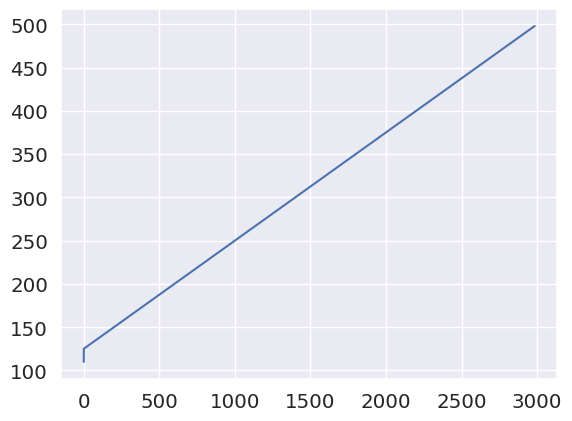

In [19]:
mx_win_sz = 16
n = 239
dif = rolling_avg(efficiencies[n], mx_win_sz)#rolling_avg(inequalities[n], mx_win_sz)

fig, ax = plt.subplots(1,1)
ax.plot(dif)
plt.show()

In [17]:
#import pandas as pd
##Read data with kmeans clustering
#df = pd.read_csv("tsne_params.csv")
#df_ik = df[["index","kmeans"]]

In [18]:
#for num, cluster in df_ik.groupby("kmeans"):
#    slopes = []
#    for n in cluster.index:
#        dif = rolling_avg(inequalities[n], mx_win_sz)
#        slopes.append((dif[-1]-dif[1])/(len(dif)-1))
#    print(np.mean(slopes),np.std(slopes))

NameError: name 'df_ik' is not defined

With 7 clusters it can be seen that the average slope measure for inequality growth coincides fairly well with the clusters.